# Analysing Suicide Data 

The contain a single CSV file that contains data on suicide done by individuals of different age groups in different countries and information on GDP, HDI, Population of that country

#### Data Description:
##### Format: CSV File( suicide_data.csv)
##### File_size: 2.71MB
##### Table_count: 1
##### Size: rows=27820, columns = 12 (27820x12)
##### Columns:- { 'country	year', 'sex	age', 'suicides_no	population', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year', 'gdp_per_capita',      'generation'}

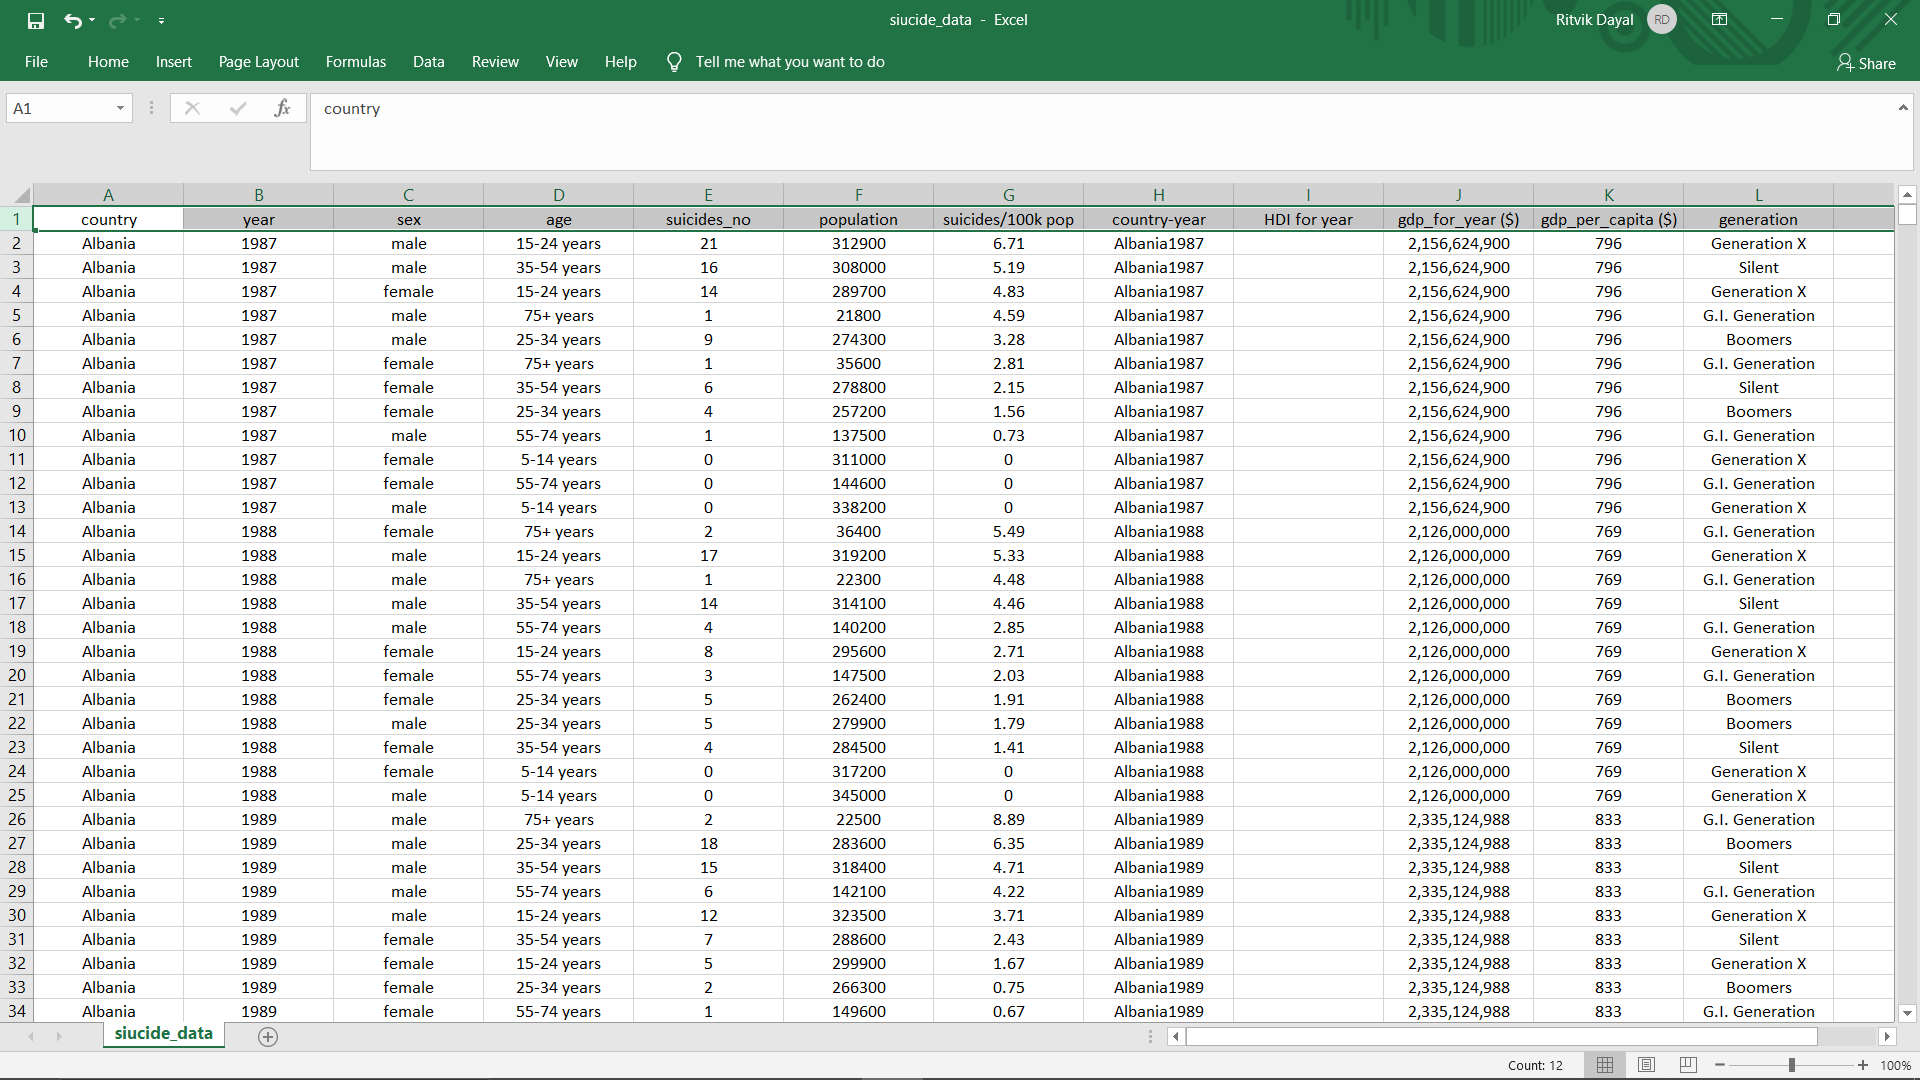

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

### Loading Data

In [4]:
df = pd.read_csv('suicide_data.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## Trying to find any direct relationship among columns

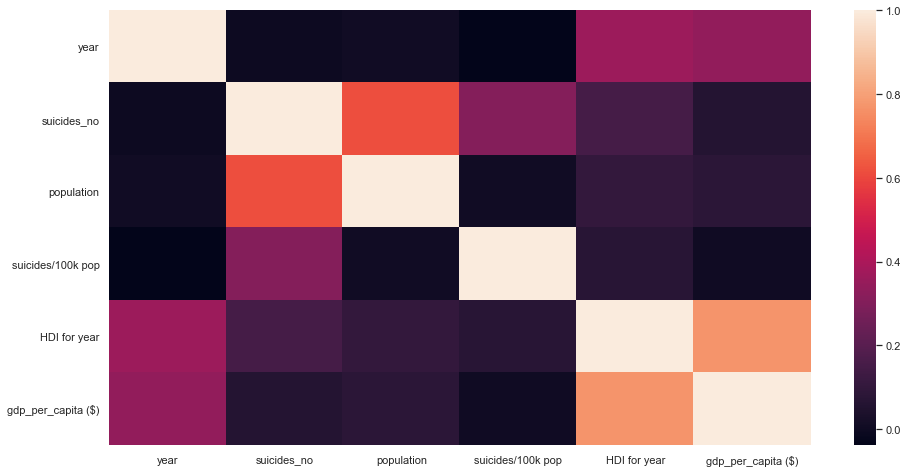

In [5]:
import seaborn as sns; sns.set()
fig = plt.figure(figsize=[14,8])
axes = fig.add_subplot(111)
sns.heatmap(df.corr(), ax=axes)

## Observation:

From the above mapping it is clear that not many column have serious direct relationship. However, we can observe a relation:
    
    Population Vs Suicides_no
    gdp_per_capita vs HDI for year

Further we can try to find relationships among the data columns direct or indirect to deduce a conclusion.

# Plotting Population vs Suicides_no

In [6]:
pop_vs_suicide_df = pd.merge(df['population'],df['suicides_no'], right_index=True, left_index=True)
pop_vs_suicide_df = pop_vs_suicide_df.dropna()
pop_vs_suicide_df

,population,suicides_no
0,312900,21
1,308000,16
2,289700,14
3,21800,1
4,274300,9
5,35600,1
6,278800,6
7,257200,4
8,137500,1
9,311000,0


In [7]:
country_counts = df['country'].value_counts()
country_counts = country_counts.reset_index()

In [8]:
def data_extraction(country_name):
    return df.loc[df['country'] == country_name]
        

In [9]:
cn_dt_dict={}
for i in country_counts['index']:
    cn_dt_dict[i] = []

In [10]:
def year_vs_suc(temp_df):
    temp_df =  pd.merge(temp_df['year'],temp_df['suicides_no'], right_index=True, left_index=True)
    return temp_df.groupby('year').mean()
    

In [11]:
country_df=[]
for i in country_counts['index']:
    country_df.append(year_vs_suc(data_extraction(i)))

In [ ]:
fig = plt.figure(figsize=[15,15])
axes = fig.subplots(5, 5)
K=0
while K <= 25 :
    for i in range(5):
        for j in range(5):
            axes[i,j].plot(country_df[K])
            K+1

#plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
country_df

In [ ]:
type(df.loc[0])

In [ ]:
plt.plot(country_df[0])
